# About Uber
<div class="alert alert-info">
Uber kickstarted the evolution of the taxi market in the early 2010s, when it launched an app which easily connected drivers with riders. Uber Technologies, Inc. is now an American multinational transportation network company based in San Francisco and has operations in approximately 72 countries and 10,500 cities.131 million people use Uber or Uber Eats once a month, an 11% increase year-on-year. It generated $31.8 billion revenue in 2022, an 82% increase on the previous year. <br>

Ridesharing is a very volatile market and demand fluctuates wildly with time, place, weather, local events, etc. The key to being successful in this business is to be able to detect patterns in these fluctuations and cater to the demand at any given time. 


### **Objective**
Assuming that I am a newly hired Data Scientist in Uber's New York Office, I have been given the task of extracting insights from data that will help the business better understand the demand profile and take appropriate actions to drive better outcomes for the business. My goal is to identify good insights that are potentially actionable.


### **Questions To Be Answered**
1. What are the different variables that influence pickups?
2. Which factor affects the pickups the most? What could be plausible reasons for that?
3. What are some recommendations to Uber management to capitalize on fluctuating demand?


### **Dataset**
The data contains information about the weather, location, and pickups.</div>

## Overview of the Dataset

In [1]:
# Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [2]:
# Load the dataset
data = pd.read_csv('Uber.csv')
data.head(20)

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
5,2015-01-01 01:00:00,Staten Island,6,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
6,2015-01-01 01:00:00,NaN,4,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
7,2015-01-01 02:00:00,Bronx,120,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
8,2015-01-01 02:00:00,Brooklyn,1229,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
9,2015-01-01 02:00:00,EWR,0,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y


<div class="alert alert-info">
- The column <b>pickup_dt</b> includes the pickup date and time.<br> 
- The date shows that the data starts from 01-Jan-2015.<br>
- The column <b>borough</b> contains the name of the New York borough in which the pickup was made.<br>
- The column <b>pickups</b> contain the number of pickups in the borough at the given time.<br> 
- All of the <b>weather variables</b> are numerical.<br>
- The variable <b>holiday</b> is categorical.<br> 

In [3]:
# The last 5 observations
data.tail()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29100,2015-06-30 23:00:00,NaN,3,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


<div class="alert alert-info">
- The head indicated that the data began on January 1, 2015, whereas the tail indicates that the data ends on June 30, 2015. <br> - This means there are <b>six months' worth of data to analyze</b>.</div>

In [4]:
# Shape of the dataset
data.shape

(29101, 13)

<div class="alert alert-info">The dataset has <b>29,101 rows and 13 columns</b>.</div>

In [5]:
# Dataframe's info function
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


<div class="alert alert-info">
- All columns have 29,101 observations except borough, which has 26,058 observations indicating that there are null values in it.<br>
- pickup_dt is read as an 'object' data type, but it should have the data type as DateTime.<br>
- borough and hday (holiday) should be categorical variables.</div>

## Descriptive Statistics

In [6]:
# Take the transpose of .describe()
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pickups,29101.0,490.215903,995.649536,0.0,1.0,54.0,449.000000,7883.00
spd,29101.0,5.984924,3.699007,0.0,3.0,6.0,8.000000,21.00
vsb,29101.0,8.818125,2.442897,0.0,9.1,10.0,10.000000,10.00
temp,29101.0,47.669042,19.814969,2.0,32.0,46.0,64.500000,89.00
dewp,29101.0,30.823065,21.283444,-16.0,14.0,30.0,50.000000,73.00
slp,29101.0,1017.817938,7.768796,991.4,1012.5,1018.2,1022.900000,1043.40
pcp01,29101.0,0.003830,0.018933,0.0,0.0,0.0,0.000000,0.28
pcp06,29101.0,0.026129,0.093125,0.0,0.0,0.0,0.000000,1.24
pcp24,29101.0,0.090464,0.219402,0.0,0.0,0.0,0.050000,2.10
sd,29101.0,2.529169,4.520325,0.0,0.0,0.0,2.958333,19.00


<div class="alert alert-info">
- There is a significant discrepancy between the third quartile and the highest value for the number of pickups (pickups) and the snow depth (sd), indicating that these variables may have <b>outliers to the right.</b><br>
- The temperature has a broad range, showing that the data includes records from the winter as well as summer seasons.<br>

I now want to check the summary of non-numeric variables.</div>

In [7]:
# Summary of non-numeric variables
data.describe(exclude = 'number').T

,count,unique,top,freq
pickup_dt,29101,4343,2015-01-01 01:00:00,7
borough,26058,6,Bronx,4343
hday,29101,2,N,27980


<div class="alert alert-info">
- The variable 'borough' has 6 unique categories. The category Bronx has occurred 4343 times in the data.
- The variable 'hday' has 2 unique categories. The category N, i.e., not a holiday as occurred more often, which makes sense.

In [8]:
# Count of each unique category in each of the categorical variables
cat_col = ['borough', 'hday']
for column in cat_col:
    print(data[column].value_counts())
    
    print('-' * 28)

Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Name: borough, dtype: int64
----------------------------
N    27980
Y     1121
Name: hday, dtype: int64
----------------------------


<div class="alert alert-info">The above output shows that the borough variable has an equal count for each category. But the NaNs seem to have been omitted from this grouping. I will get to this in a bit. </div>

### Date Extraction

In [9]:
# Convert pickup_dt datatype to datetime 
data.pickup_dt = pd.to_datetime(data.pickup_dt)

# Extract date parts from pickup_dt
data['start_year'] = data.pickup_dt.dt.year

data['start_month'] = data.pickup_dt.dt.month_name()

data['start_hour'] = data.pickup_dt.dt.hour

data['start_day'] = data.pickup_dt.dt.day

data['week_day'] = data.pickup_dt.dt.day_name()

# Remove the pickup_dt column as it will not be required for further analysis
df = data.drop('pickup_dt', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   borough      26058 non-null  object 
 1   pickups      29101 non-null  int64  
 2   spd          29101 non-null  float64
 3   vsb          29101 non-null  float64
 4   temp         29101 non-null  float64
 5   dewp         29101 non-null  float64
 6   slp          29101 non-null  float64
 7   pcp01        29101 non-null  float64
 8   pcp06        29101 non-null  float64
 9   pcp24        29101 non-null  float64
 10  sd           29101 non-null  float64
 11  hday         29101 non-null  object 
 12  start_year   29101 non-null  int64  
 13  start_month  29101 non-null  object 
 14  start_hour   29101 non-null  int64  
 15  start_day    29101 non-null  int64  
 16  week_day     29101 non-null  object 
dtypes: float64(9), int64(4), object(4)
memory usage: 3.8+ MB


<div class="alert alert-info">
- There are now 5 new columns.<br>
- 1 column has been deleted. </div>

### Missing Values

In [10]:
# Check for missing values
df.isna().sum()

borough        3043
pickups           0
spd               0
vsb               0
temp              0
dewp              0
slp               0
pcp01             0
pcp06             0
pcp24             0
sd                0
hday              0
start_year        0
start_month       0
start_hour        0
start_day         0
week_day          0
dtype: int64

In [11]:
# Checking the missing values further
df.borough.value_counts(normalize = True, dropna = False)

Bronx            0.149239
Brooklyn         0.149239
EWR              0.149239
Manhattan        0.149239
Queens           0.149239
Staten Island    0.149239
NaN              0.104567
Name: borough, dtype: float64

<div class="alert alert-info">
All 6 categories have almost the same percentage of frequency ~15%, there is no mode for this variable. The percentage of missing values (NaN) is close to the percentage of observations from other boroughs, and so I will name them as a separate category - UNKNOWN. </div>

In [12]:
# Replace NaN with Unknown
df['borough'].fillna('Unknown', inplace = True)
df.borough.value_counts()

Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Unknown          3043
Name: borough, dtype: int64

In [13]:
df.isnull().sum()

borough        0
pickups        0
spd            0
vsb            0
temp           0
dewp           0
slp            0
pcp01          0
pcp06          0
pcp24          0
sd             0
hday           0
start_year     0
start_month    0
start_hour     0
start_day      0
week_day       0
dtype: int64

No missing values here. 

## Univariate EDA
### Numerical Variables

In [14]:
# Create a function that displays both the boxplot and histogram for input variables
def histogram_boxplot(feature, figsize = (15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,     # Number of rows of the subplot grid
                                           sharex = True, # The X-axis will be shared among all the subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           )
    # Create the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color ='red')
    
    # For histogram
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins) if bins else sns.distplot(feature, kde = False, ax = ax_hist2)
    ax_hist2.axvline(np.mean(feature), color = 'g', linestyle = '--')      # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

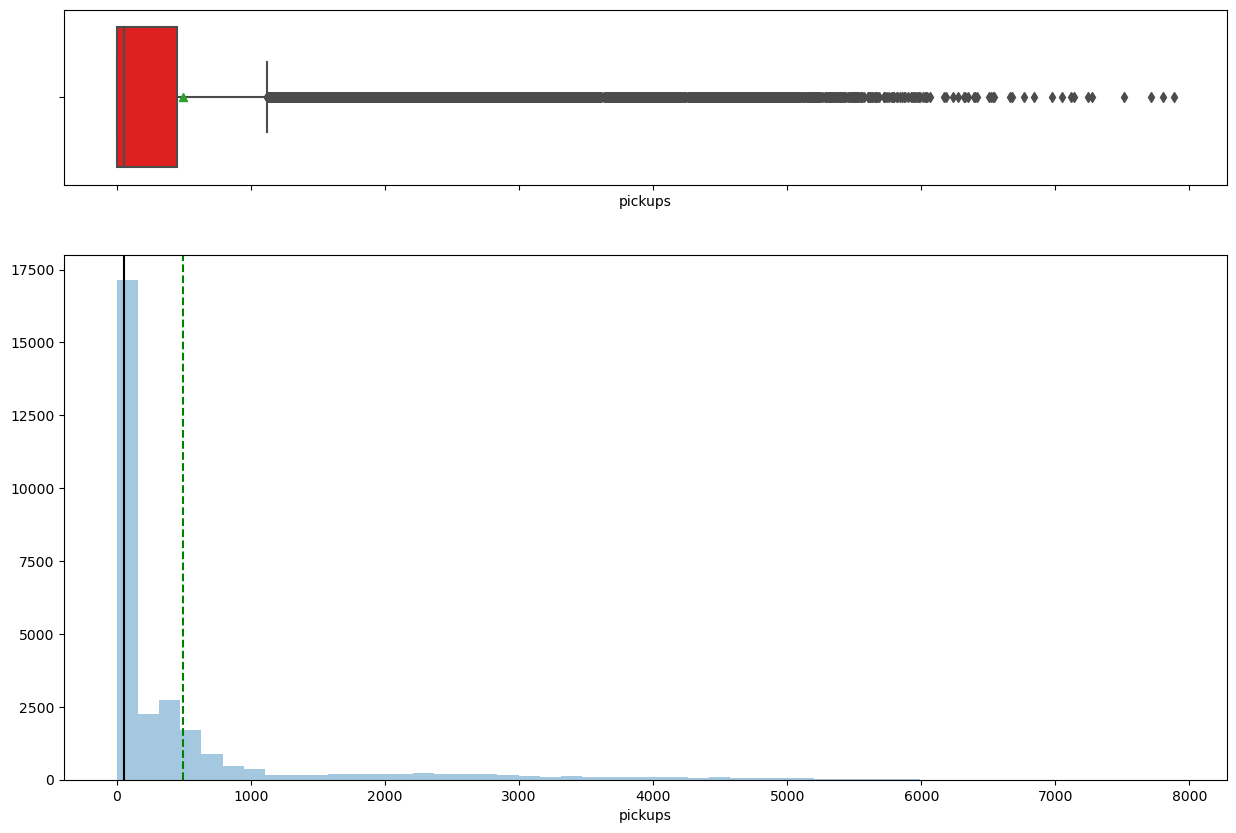

In [15]:
# Univariate analsis for pickups column
histogram_boxplot(df['pickups'])

* The distribution looks right skewed.
* Most of the hourly pickups are close to zero.
* From the boxplot, it is seen that there are a lot of outliers. While most pickups are around zero, there are hourly pickups that went as high as 8000.
* The median is 0, but the mean is around 500.

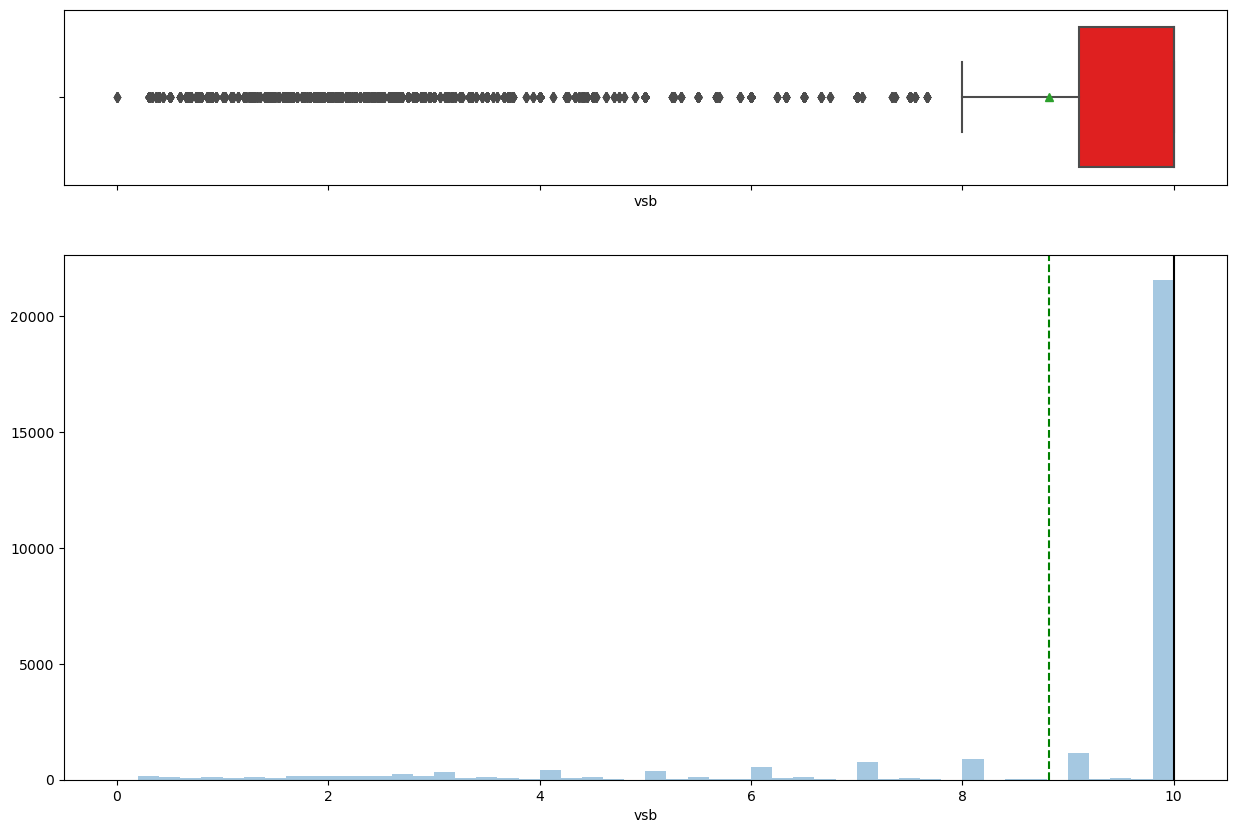

In [16]:
# Univariate analysis on visibility
histogram_boxplot(df.vsb)

* The distribution is left-skewed
* Both the mean and median are hgh, and so looks like the visibility is great most days.
* Sometimes visibility can be extremely low as explained by the outliers to the left on the boxplot.

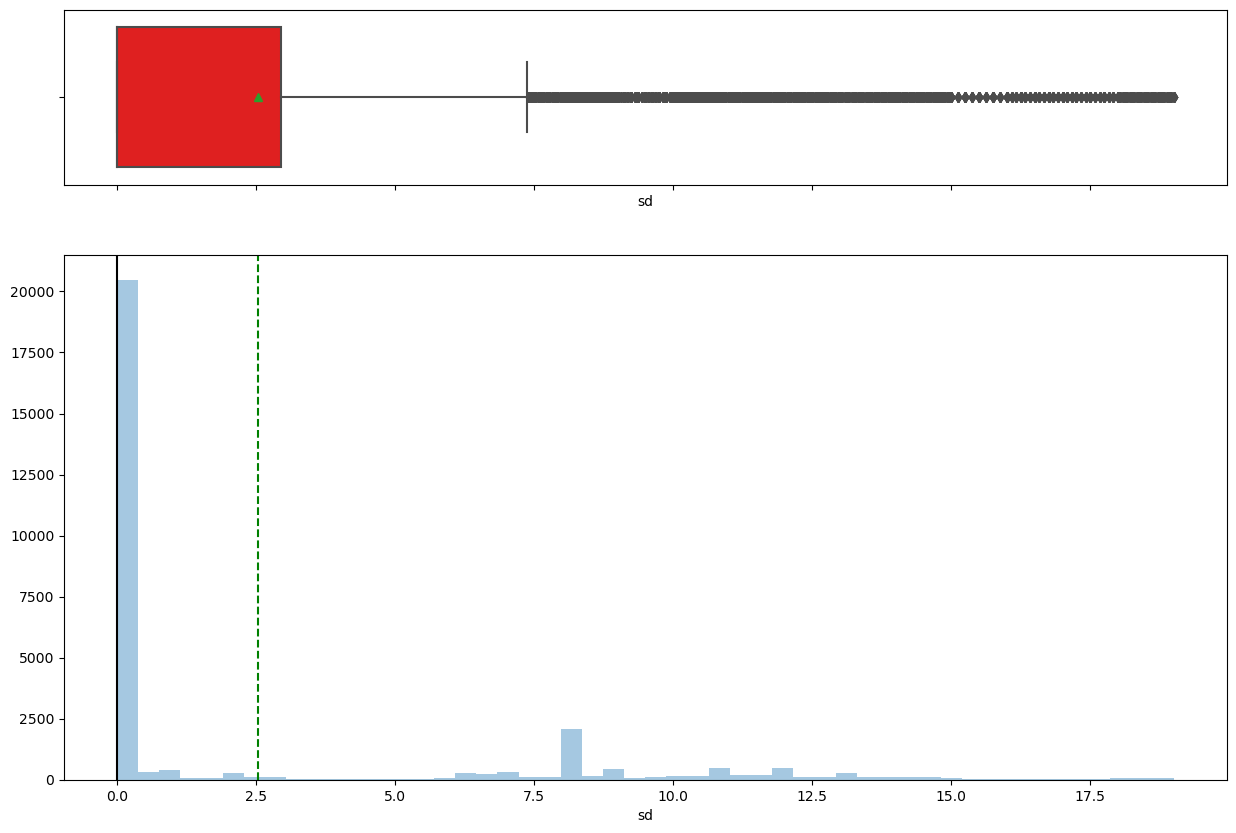

In [17]:
# Univariate analysis on snow depth
histogram_boxplot(df.sd)

* The distribution is again right-skewed.
* The period of analysis contains snowfall. Maybe it was through winter.
* Pickups can be low when there is snowfall, generally speaking. So it would be interesting to compare pickups and snow days.

### Categorical Variables 

In [18]:
# Function to create barplots that indicate the % of each category
def bar_per(data, z):
    
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))
    
    # plt.xticks(rotation = 45) 
    ax = sns.countplot(data[z], palette = 'Paired')
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage 
        
    plt.show()                                                      # Display the plot

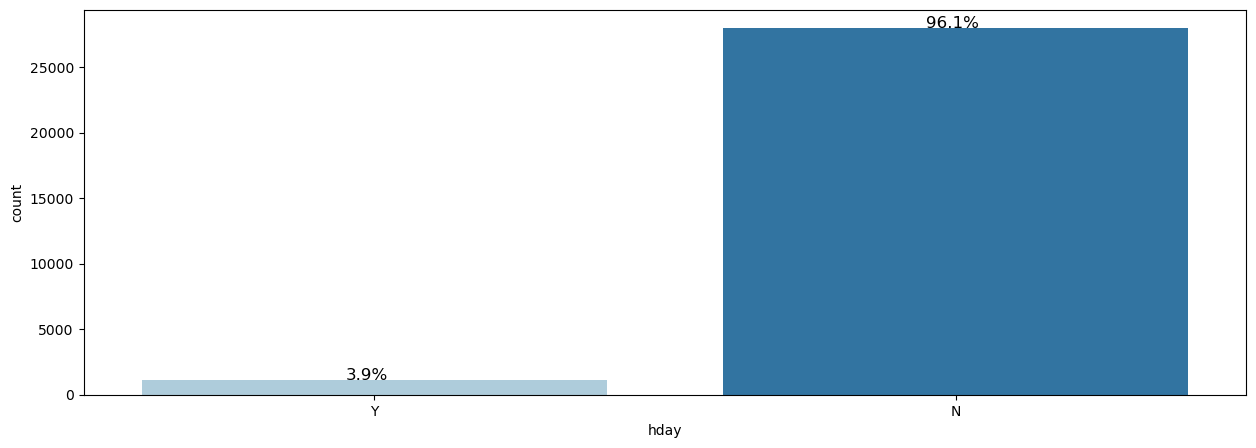

In [19]:
# Univariate analysis on holiday
bar_per(df, 'hday')

Only ~4% of the days were holidays in the period of analysis.

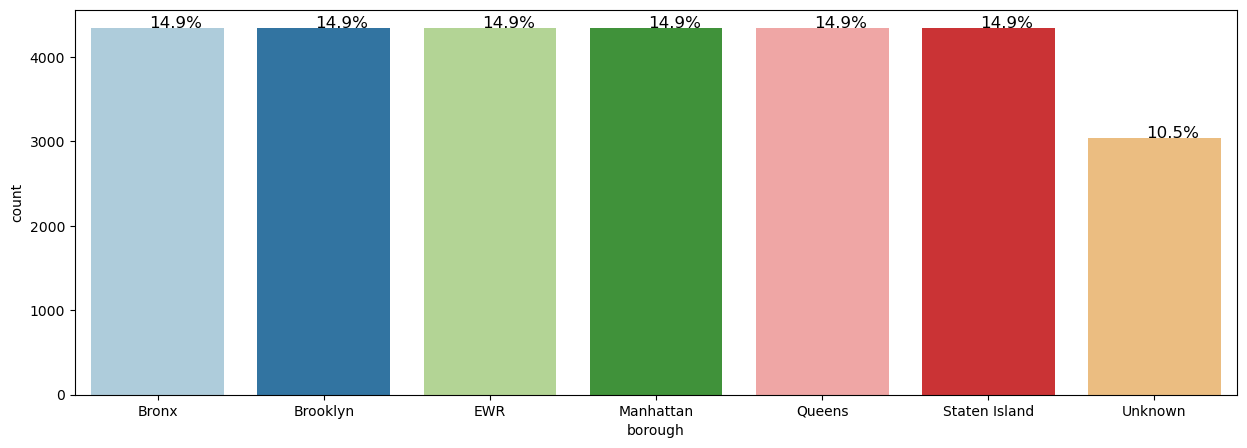

In [20]:
# Univariate analysis on borough
bar_per(df, 'borough')

* The bar plots show that the observations are uniformly distributed, except the last bar- unknown. 

## Multivariate Analysis

<AxesSubplot:>

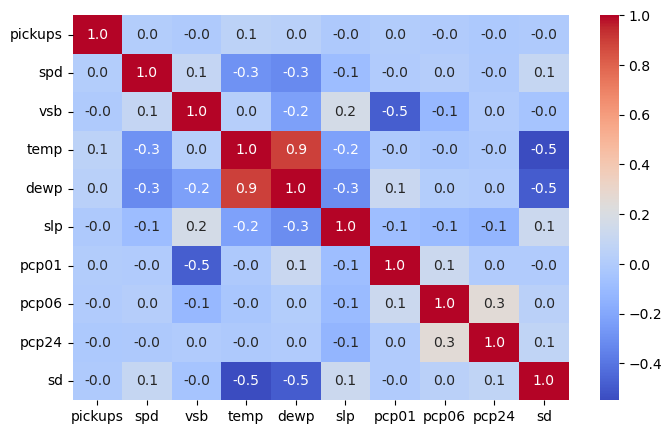

In [21]:
# Heatmap for correlations between variables
# Correlation among numerical variables

# Create a list of numerical variables
num_var = ['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']

# Check for correlation
corr = df[num_var].corr()

# Plot the heatmap
plt.figure(figsize = (8, 5))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',            
        fmt = ".1f",            
        xticklabels = corr.columns,            
        yticklabels = corr.columns)

* Dew point (indication of humidity) is correlated with temperature and the same thing can be observed in the heatmap as well. Temperature shows a high correlation with dew point.
* Visibility is negatively correlated with precipitation. If the rains are high during the hour, visibility is low. This is aligned with our intuitive understanding.
* Snow depth, of course, is negatively correlated with temperature.
* The wind speed and the sea level pressure are negatively correlated with the temperature.

## Pickups vs Time Variables

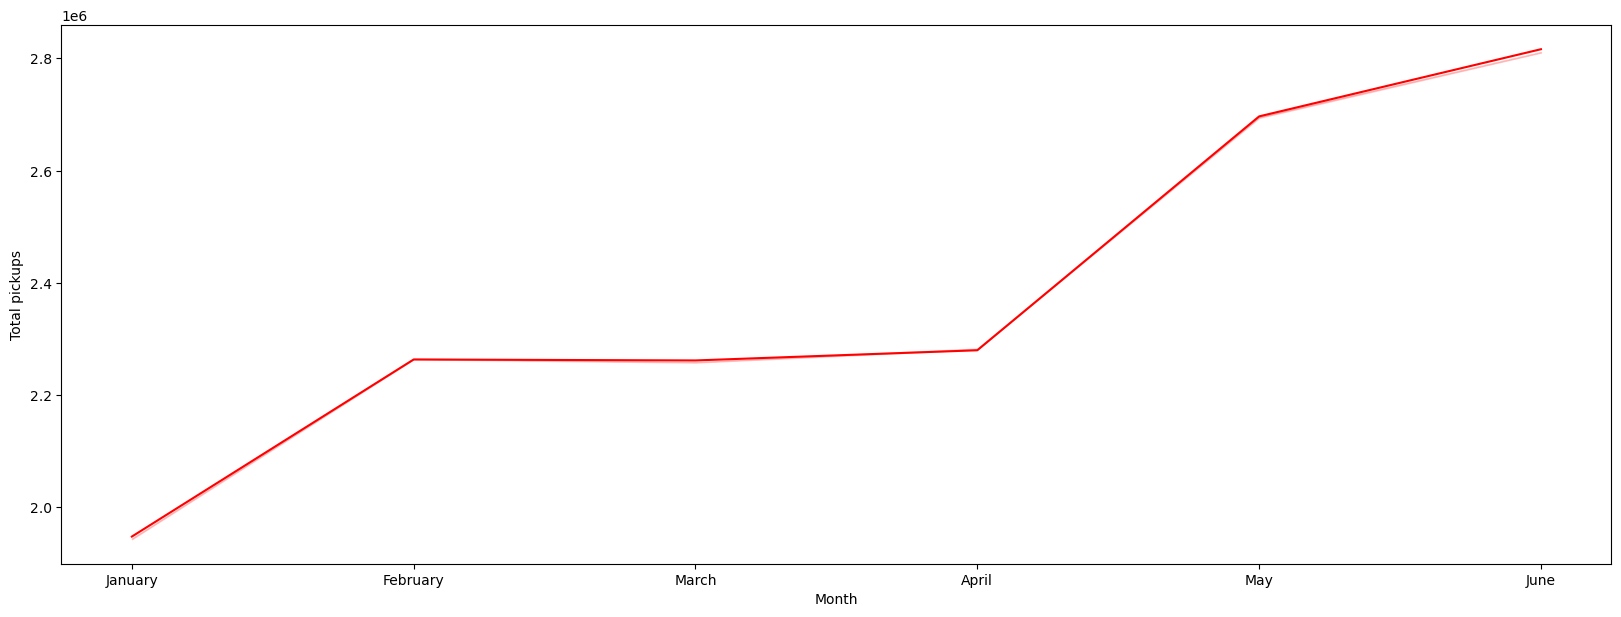

In [22]:
# Pickups across Months
cats = df.start_month.unique().tolist()
df.start_month = pd.Categorical(df.start_month, ordered = True, categories = cats)
plt.figure(figsize = (20, 7))
sns.lineplot(x = "start_month", y = "pickups", data = df, ci = True, color = "RED", estimator = 'sum')
plt.ylabel('Total pickups')
plt.xlabel('Month')
plt.show()

There is an increasing trend in monthly bookings. Bookings in June are about 1.5 times that of those in January. 

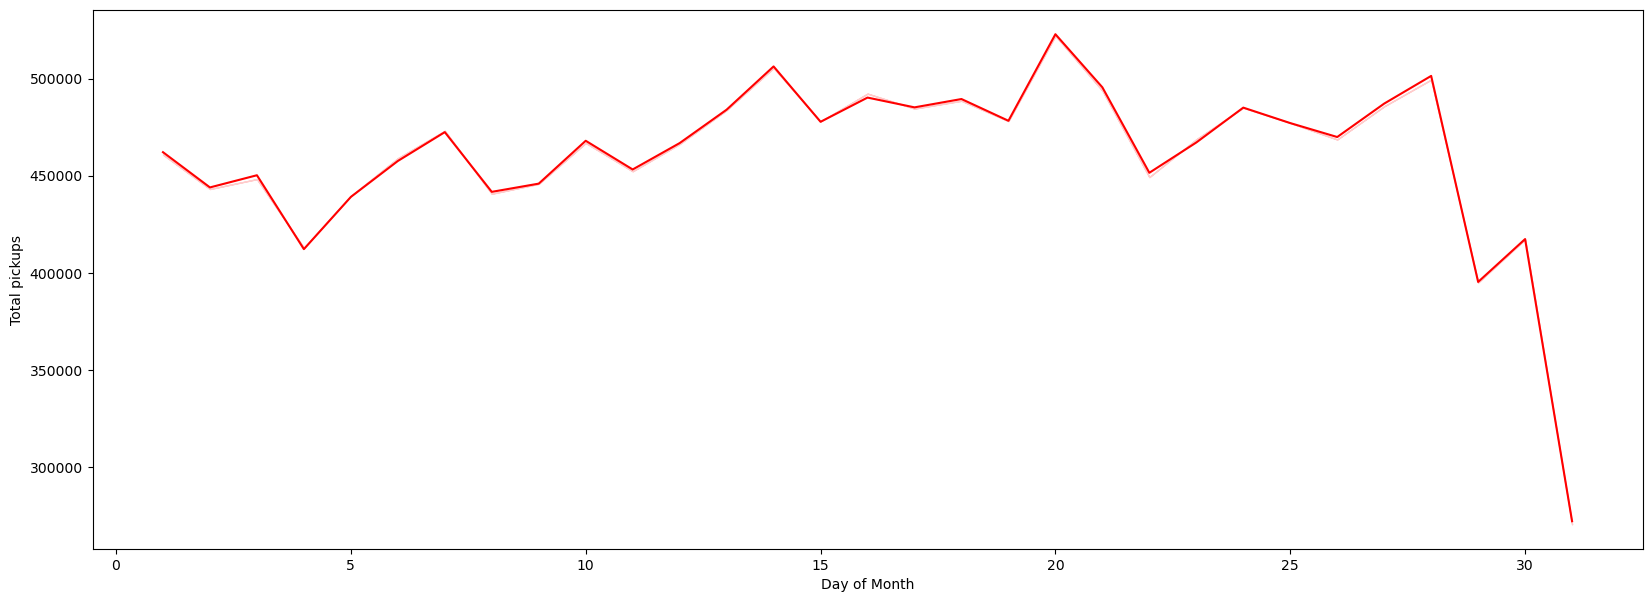

In [23]:
# Pickups vs Days of Months
plt.figure(figsize = (20, 7))
sns.lineplot(x = "start_day", y = "pickups", estimator = 'sum', ci = 0, data = df, color = "RED")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')
plt.show()

* Number of pickups are low towards the end of the month. This could be because half the months have only 30 days and the 31st day is not accounted for in the dataset. 
* The peak in the bookings is around the 20th of each month.

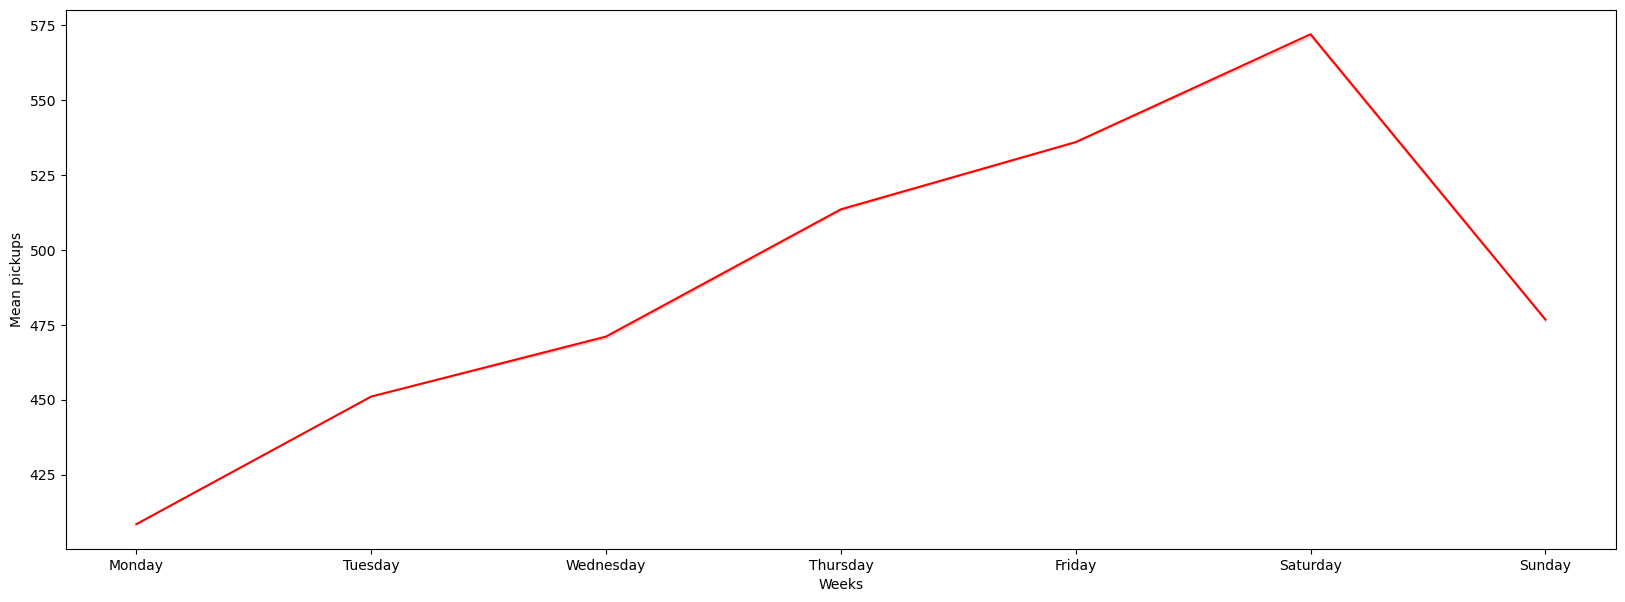

In [24]:
# Pickups vs Weekdays
cats = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
df.week_day = pd.Categorical(df.week_day, ordered = True, categories = cats)
plt.figure(figsize = (20, 7))
sns.lineplot(x = "week_day", y = "pickups", ci = 0, data = df, color = "RED")
plt.ylabel('Mean pickups')
plt.xlabel('Weeks')
plt.show()

* As the week progresses, pickups gradually increase, and dips on Sunday. 

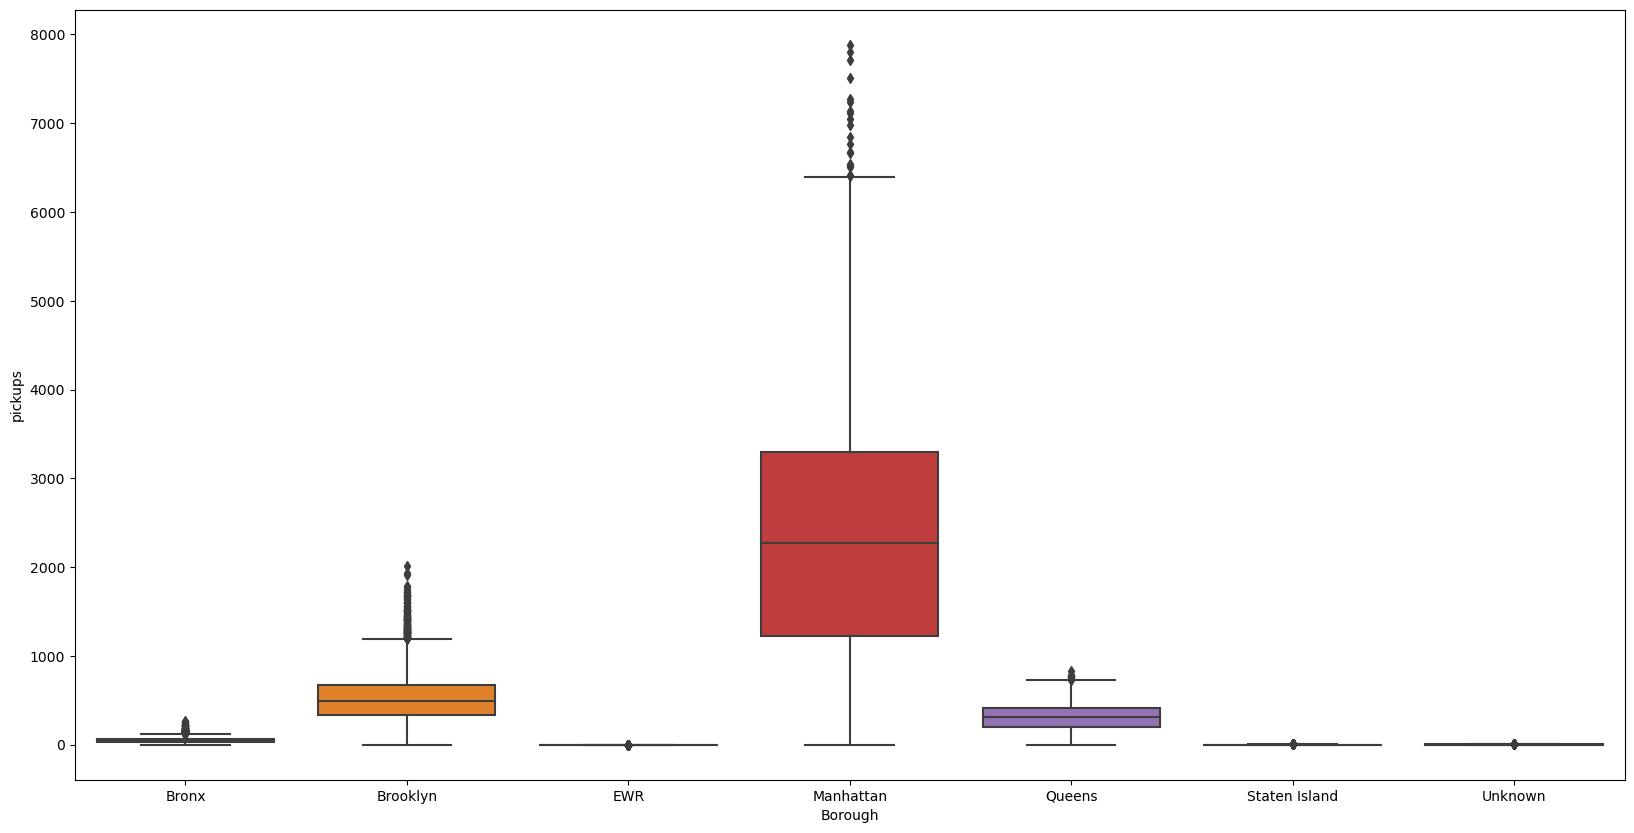

In [25]:
# Pickups vs Boroughs
plt.figure(figsize = (20, 10))  
sns.boxplot(df['borough'], df['pickups'])
plt.ylabel('pickups')
plt.xlabel('Borough')
plt.show()

* Manhatten has the highest number of bookings.
* Next in line are Brooklyn and Queens.
* In contrast, EWR, Staten Island, and Unknown have very low bookings.

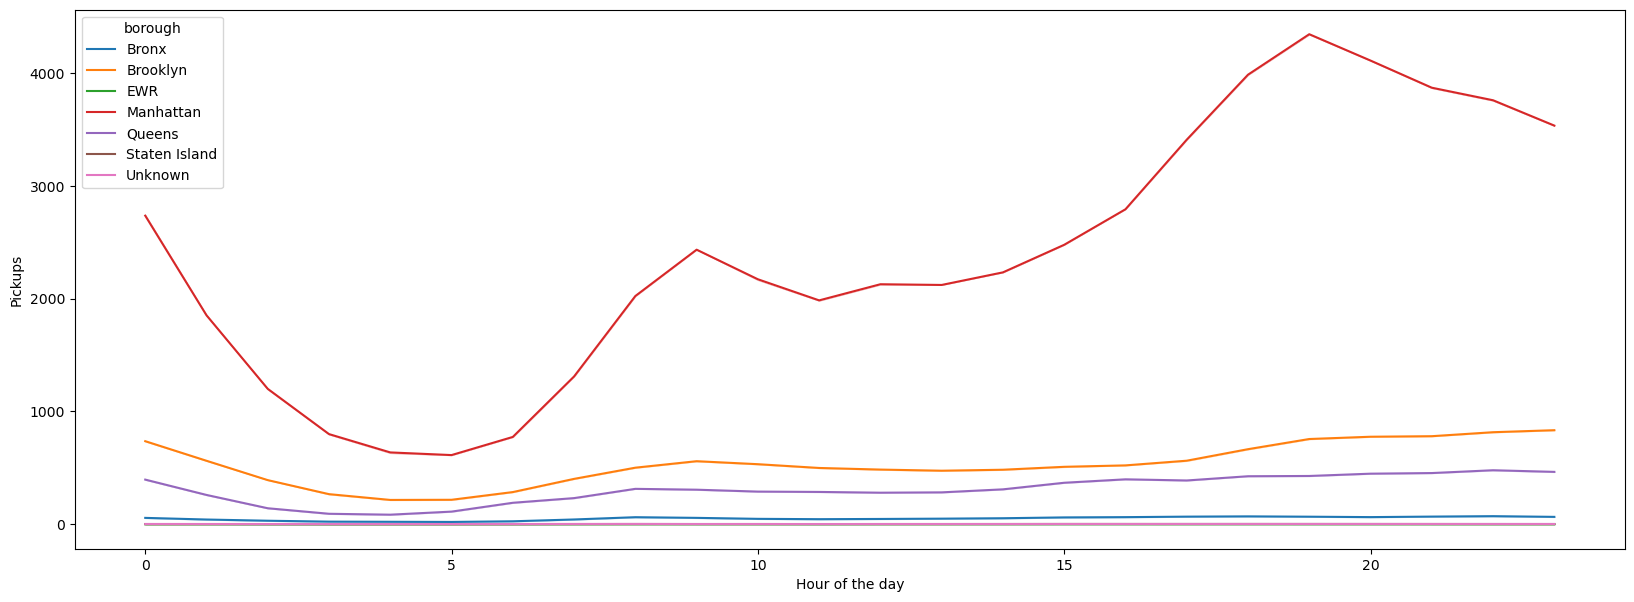

In [26]:
# Pickups vs Hour of the day across boroughs
plt.figure(figsize = (20, 7))
sns.lineplot(x = "start_hour", y = "pickups", ci = 0, data = df, hue = 'borough')
plt.ylabel('Pickups')
plt.xlabel('Hour of the day')
plt.show()

* Bookings peak around the 19th and 20th hour of the day and decreases till 5 am.
* The peak can be attributed to the time people leave their workplaces.
* From 5 AM onwards, there an increasing trend till 10 am, possibly the office rush.
* Pickups go down from 10 am to 12 pm, post that they start increasing.
* The number of pickups in Manhattan is very high and dominant when we see the spread across boroughs. 
* The lower few boroughs are not at all visible as they have very low values. 

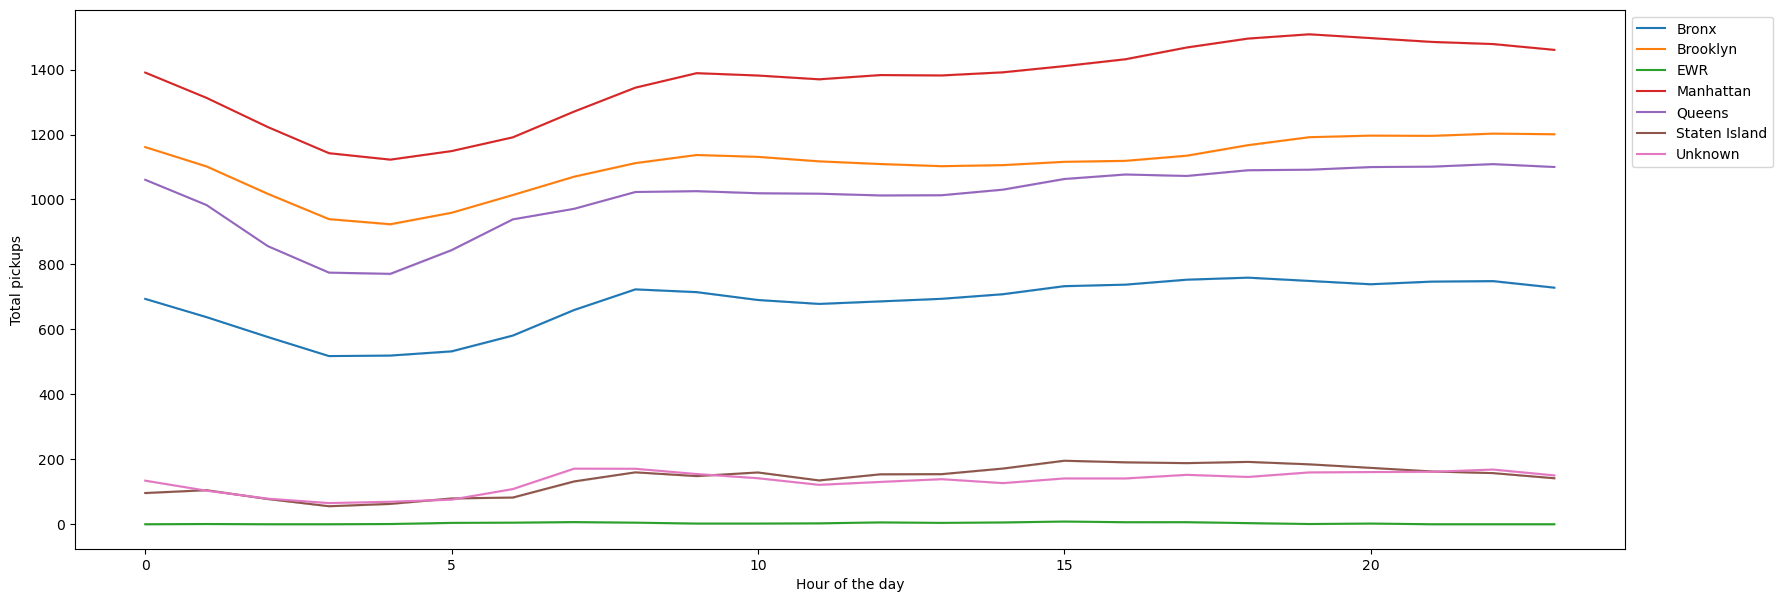

In [27]:
# Same graph on a logarithmic scale
plt.figure(figsize = (20, 7))
sns.lineplot(x = df.start_hour, y = np.log1p(df.pickups), estimator ='sum', ci = 0, hue = df.borough)
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

* An hourly pattern is seen in almost all the boroughs.
* After applying the logarithmic scale, the four major boroughs follow the same pattern. 
* EWR seems to have a random demand with a majority of the values being zero.
* Manhattan sees the most Uber pickups. 

### Manhatten Pickups Heatmap

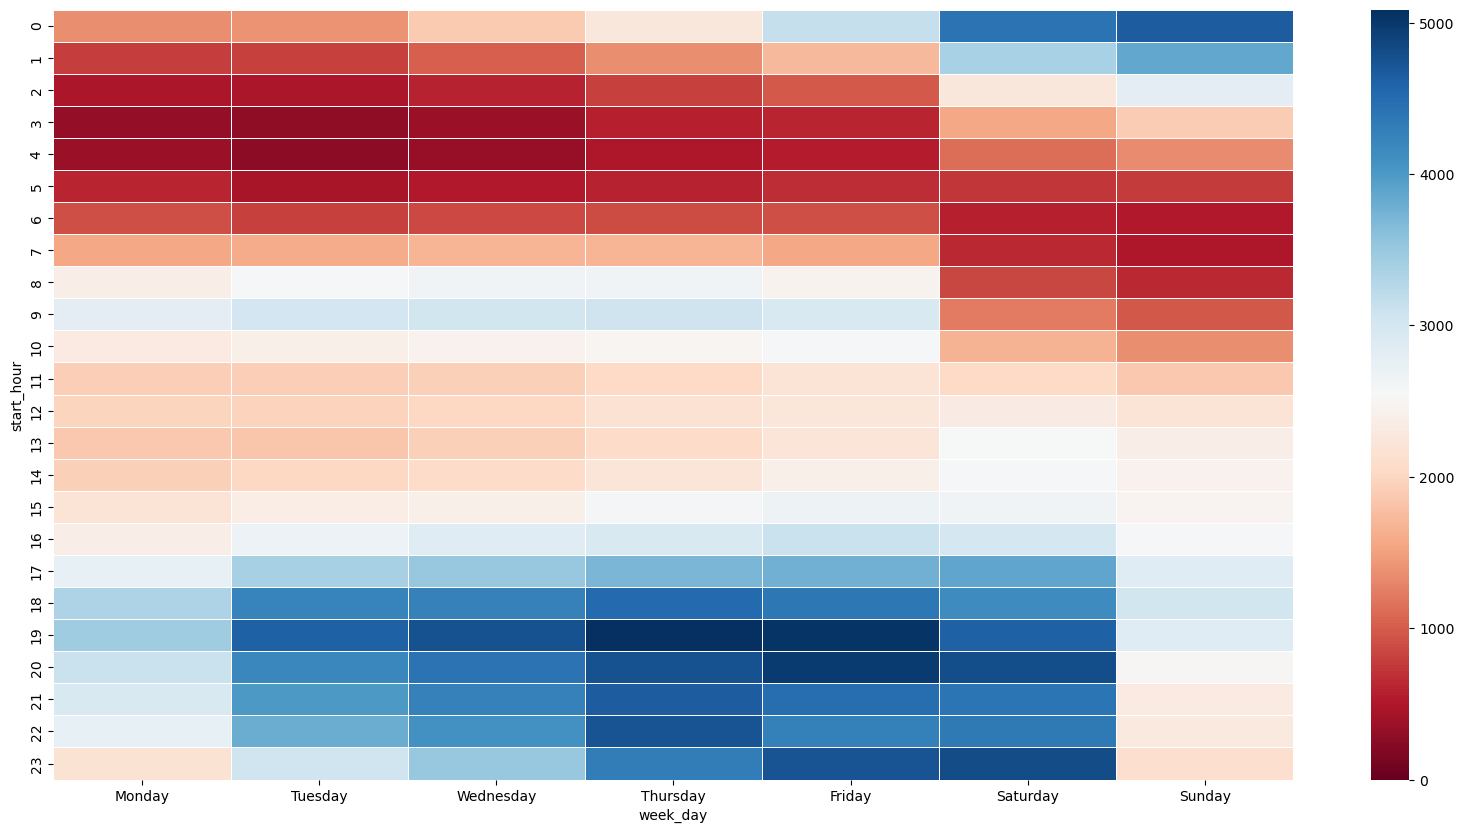

In [32]:
# Pivot Table
df_man = df[df.borough == 'Manhattan']
df_hm = df_man.pivot_table(index = 'start_hour', columns = 'week_day', values = 'pickups')

# Heatmap
plt.figure(figsize = (20, 10)) # To resize the plot
sns.heatmap(df_hm,  fmt = "d", cmap = 'RdBu', linewidths = .5, vmin = 0)
plt.show()

* The demand for Uber peaks during the late hours of the day when people are returning home from the office.
* Demand continues to be high during the late hours of the day (midnight) on Fridays and Saturdays.  
* It is odd that the demand for Uber is not as high on Monday evenings in comparison to other working days.
* It is also odd that demand is less during the mornings when people need to get to work on time.

# Conclusions
A dataset of nearly 30K hourly Uber pickup information, from New York boroughs has been analyzed.
The data spanned every day of the first six months of the year 2015.
The main feature of interest here is the number of pickups. 
From an environmental and business perspective, having cars roaming in an area while the demand is in another or filling the streets with cars during a low demand period while lacking during peak hours is inefficient. Thus, I determined the factors that affect pickup and the nature of their effect. Some of the conclusions are:

1. Uber cabs are most popular in the Manhattan area of New York.
2. Contrary to intuition, weather conditions do not have much impact on the number of Uber pickups.
3. The demand for Uber has been increasing steadily over the months (Jan to June).
4. The rate of pickups is higher on the weekends in comparison to weekdays.
5. It is encouraging to see that New Yorkers trust Uber taxi services when they step out to enjoy their evenings.
6. I can also conclude that people use Uber for regular office commutes. The demand steadily increases from 6 AM to 10 AM, then declines a little and starts picking up till midnight. The demand peaks at 7-8 PM.
7. I need to further investigate the low demand for Uber on Mondays.


# Recommendations

1. Manhattan is the most mature market for Uber. Brooklyn, Queens, and Bronx show potential. 
2. There has been a gradual increase in Uber rides over the last few months, and we need to keep up the momentum.
3. Riderships are high at peak office commute hours on weekdays and during late evenings on Saturdays. Cab availability must be ensured during these times.
4. The demand for cabs is the highest on Saturday nights. Cab availability must be ensured during this time of the week.
5. Procure data for fleet size availability to get a better understanding of the demand-supply status and build a machine learning model to accurately predict pickups per hour, to optimize the cab fleet in respective areas.
6. Procure more data on price and build a model that can predict optimal pricing.